# VME 298: Assingment 1

### Due 7th April 2022 9AM

* For all questions you must show your work. This enables us to understand your thought process, give partial credit and prevent crude cheating.
* Please ensure that you are not copying each-others code, but rather understand each-others work and learn from it.   
* Please provide the R code at the end of your solution. Include R commands with R outputs. It helps to describe your solutions. 

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

make sure you have following packaeges installed. 
1. Tidyverse
2. dplyr
3. GGplot2
4. sjPlot

## Will the hummer survive?

#### You are a wildlife veterinarian and are interested in understanding the trends in hummingbird survival in California. You collaborate with a few regional rehabilitation centers and develop a dataset of hummingbird rehabiliation cases based on records established by the rehabilitation centers. 

#### The data recorded was following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, Non-selasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummmingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to rehabilitation center  
season: season when it was admitted  
r: reason for admission  
G_O: species classification: Green or Orange bird  
ID: unique ID given to individual bird  



* Your aim is it idenify factors that affect the survival or sucessful release of hummingbirds once they are admitted to the rehabilitation center
* You are expected to do following 
1. Tabulate and plot the distrbution of your ourcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best fitting model
6. Run forward addition to find best fitting model

# Section 1
### Reading the data
Here you will read the **Hummingbird_data.csv** file dataset and create a random sample of it.   
**The random sample dataset is what you will use to do the rest of the excersice.** 

**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [1]:
#read the csv file and
data  = read.csv("C:/Users/prana/Desktop/MPM 204/Week 1/Hummingbird_data.csv")

Warning message in file(file, "rt"):
"cannot open file 'C:/Users/prana/Desktop/MPM 204/Week 1/Hummingbird_data.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


In [2]:
colnames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [3]:
dim(data)

[1] 6908   12

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [4]:
library(dplyr)
model_data = sample_n(data, 5000)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




**Use *model_data* dataframe to answer remainder question of the assingment.**

**Q3: How many rows and columns are present in your dataframe now?  
1 Point**

**Q4: How many columns are categorical variables and how many are continuous variables in the dataset?  
2 Points**

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it.  
2 Points**

In [5]:
library(ggplot2)

# Section 2
## Rehabilation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehab center (represented by column Place).  
We will use functions from *dplyr* to generate summary tables and plot them using GGplot2

In [6]:
model_data%>% 
group_by(Place)%>% 
summarise(count = n_distinct(ID))

Place,count
<fct>,<int>
Lindsey,4129
malibu,795
Santa Barbara,76


In [7]:
rehab = model_data  %>% 
group_by(Place)%>% 
summarise(count = n_distinct(ID))

In [8]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

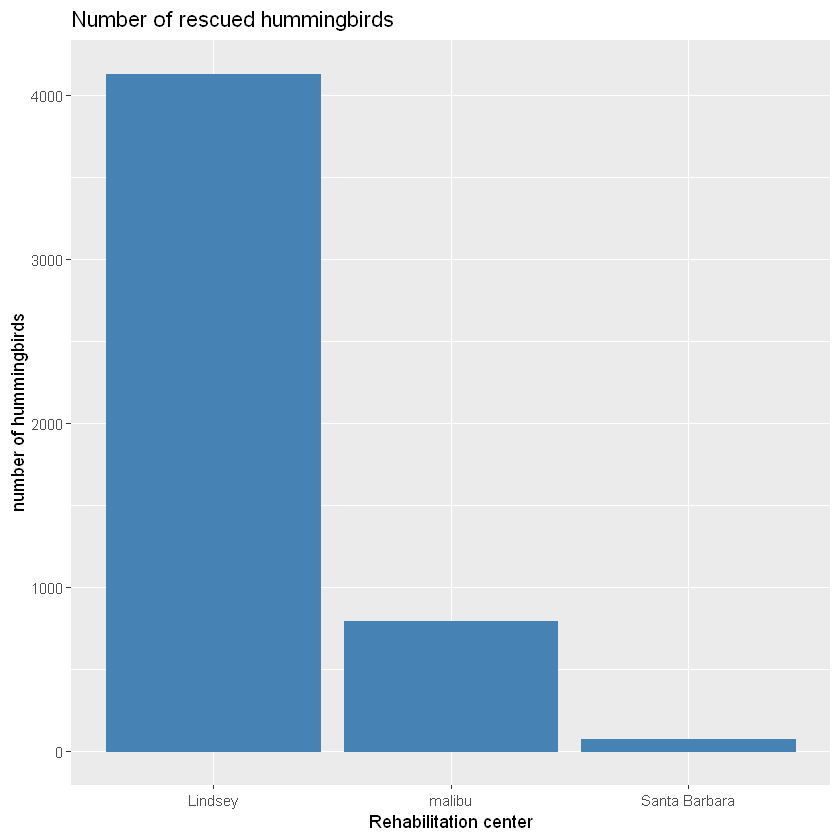

In [9]:
p

**Q6: Save this plot to a pdf file and submit it along with your assingment.  
Make sure the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

**Q7: Explain the code above in words. What is each line of R code is doing.   
Starting from the code that creates the "Rehab" onject until the plot.**  

# Section 3

## Key variables that affect can affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing number of birds survived and died for each subcategory for the covariate.  
3. To do that create a table first with COVARIATE, Disposition_binary and unique IDs
4. Then use that dataframe to generate barplots and use **facet_grid** function in GGPlot 

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [10]:
reason = model_data  %>% 
group_by(Disposition_binary, r)%>% 
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Disposition_binary'. You can override using the `.groups` argument.



In [11]:
reason

Disposition_binary,r,count
<fct>,<fct>,<int>
Died,caught by domestic animal,474
Died,found inside,115
Died,found on the ground,1422
Died,nest-related,259
Died,suspect torpor-like state,86
Died,unknown,498
Died,window hit,379
Released,caught by domestic animal,166
Released,found inside,45


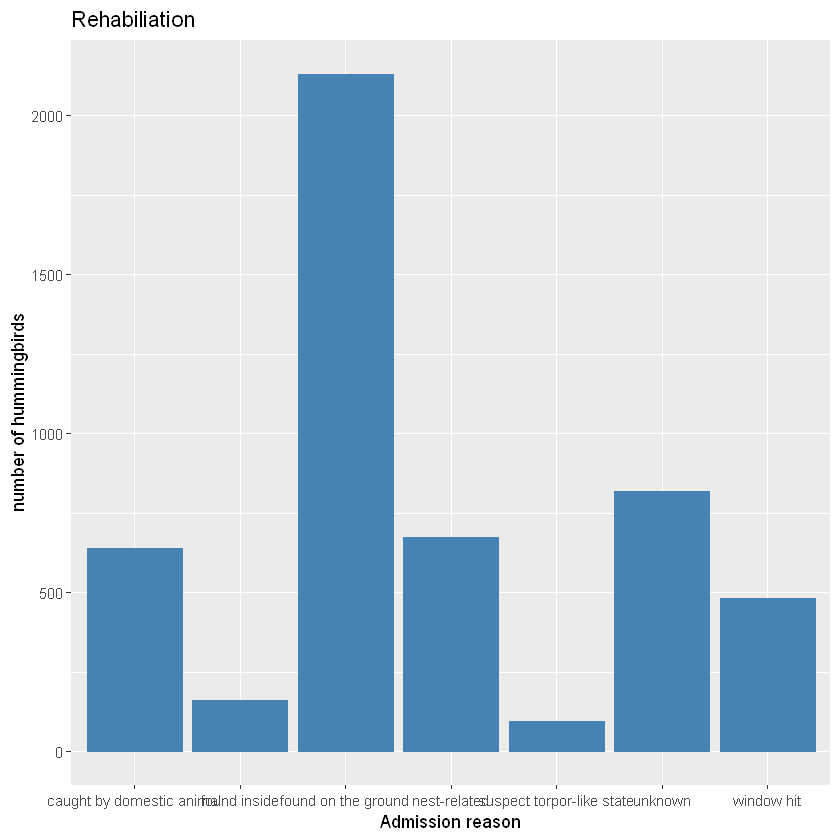

In [12]:
p = ggplot(reason, aes(x = r, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Admission reason')+ ylab('number of hummingbirds')+
labs(title = "Rehabiliation ")
p

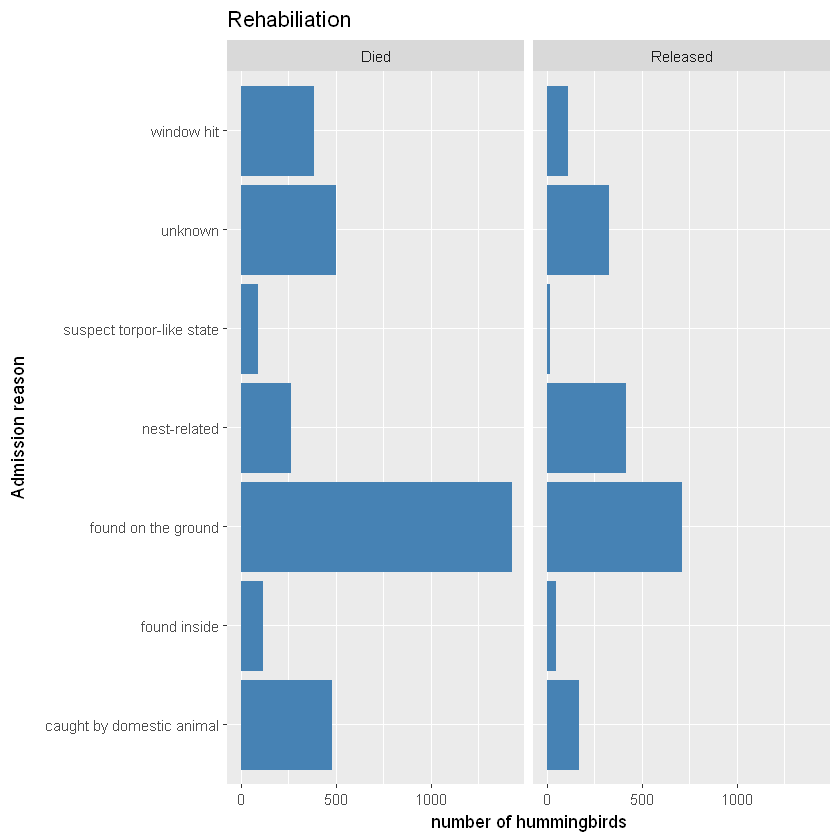

In [13]:
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

**Q9: Run univariate glm for testing the associations.   
Use *glm* function.  
Points: 10** 
1. Which family will you be using? 
2. What is the default link option for your selected family? Which other options can you select? Use R documentation, StackOverflow and other online resourses to search for the answer. 
3. From the disposition column what your "sucess" from the binomial distrbution?
4. How did you find which outcome is sucess and which one is failure?
5. Will it change my model if I reverse the sucess and failure?
6. Which variable is has the higest Beta value?

# Section 4: Running full model and model selection

**Q10: Perform backwards elimination to select a good ftting model for predicting the logit of 
probability of survival starting from the model which contains all five predictors that you selected in the previous question.
Use *step* function to achieve the selection. We will go through model selection in detail in unpcoming classes. So, do not worry about it for now, but this is one of the methods to select best model by dropping individual covariates.  
Points: 10**

1. Fit a full model 
2. use following command with full model to do stepwise model selection

In [14]:
fullmodel  = glm(Disposition_binary ~ r + Green_Orange + season+F_Aid+Species_e, data = model_data, family= binomial(link = logit))
fullmodel


Call:  glm(formula = Disposition_binary ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                     -2.0897                        0.2497  
        rfound on the ground                 rnest-related  
                      0.1827                        0.7272  
  rsuspect torpor-like state                      runknown  
                     -1.0699                        0.4115  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                     -0.1027                        0.2950  
                seasonSpring                  seasonSummer  
                      1.1713                        1.0527  
                seasonWinter                      F_AidYes  
                      0.6700                       -0.1617  
               Species_eBCHU      Species_eNon-selasphorus  
                      0.2090                 

In [15]:
backward_model = step(fullmodel,k=2,direction = "backward",test="Chisq")

Start:  AIC=5892.05
Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5892.05
Disposition_binary ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5864.0 5892.0                      
- F_Aid      1   5869.8 5895.8   5.721   0.01676 *  
- r          6   5929.7 5945.7  65.675 3.141e-12 ***
- season     3   5948.7 5970.7  84.660 < 2.2e-16 ***
- Species_e  3   6061.4 6083.4 197.340 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [16]:
forward_model = step(fullmodel,k=2,direction = ,test="Chisq")

Start:  AIC=5892.05
Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5892.05
Disposition_binary ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5864.0 5892.0                      
- F_Aid      1   5869.8 5895.8   5.721   0.01676 *  
- r          6   5929.7 5945.7  65.675 3.141e-12 ***
- season     3   5948.7 5970.7  84.660 < 2.2e-16 ***
- Species_e  3   6061.4 6083.4 197.340 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


**Q 11: Describe the best fitting model: covariates in models selected by forward and backward selection process  
Q 12: Find the covariate with highest Odds on survival  
Q 13: Did both the models have same measures of effects for covariates?  
Points: 5**

# Section 5: explore the glm object

**Q13: How many model properties are avaiable to call after model fitting?** 
**Points 1**
use following command

In [18]:
names(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

explore individual attributes of the fitted model and read about it in the R documentation

**Q14: Calcuate Odds ratios from these outputs**  
Which variable has the highest odds of survival for hummingbirds?
**Points 5:**

**Q15: Write down in words the interpretation of the higest Odds ratio seen**  
**Point:1**

In [19]:
library(sjPlot)

**Q16: from sjPlot library use following command and see if Odds ratio you calculated from previous answer match to the ones provided by the package.  
Points: 2**

In [20]:
tab_model(backward_model)